<a href="https://colab.research.google.com/github/ahnnoah/study/blob/main/Colab/2022/7_%EB%B9%84%ED%8A%B8_%EC%BD%94%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN으로 비트 코인 시세 예측하기
안노아

In [ ]:
# 1번 셀

# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# 2번 셀

# 하이퍼 파라미터
MY_PAST = 5         # 과거 데이터 수
MY_HIDDEN = 256     # LSTM 단에서 계산하는 데이터 수
MY_EPOCH = 100


            Close
Date             
2010-06-29  4.778
2010-06-30  4.766
2010-07-01  4.392
2010-07-02  3.840
2010-07-06  3.222
2010-07-07  3.160
2010-07-08  3.492
2010-07-09  3.480
2010-07-12  3.410
2010-07-13  3.628
             Close
count  2905.000000
mean    125.373154
std     230.559688
min       3.160000
25%      17.559999
50%      46.153999
75%      66.954002
max    1229.910034


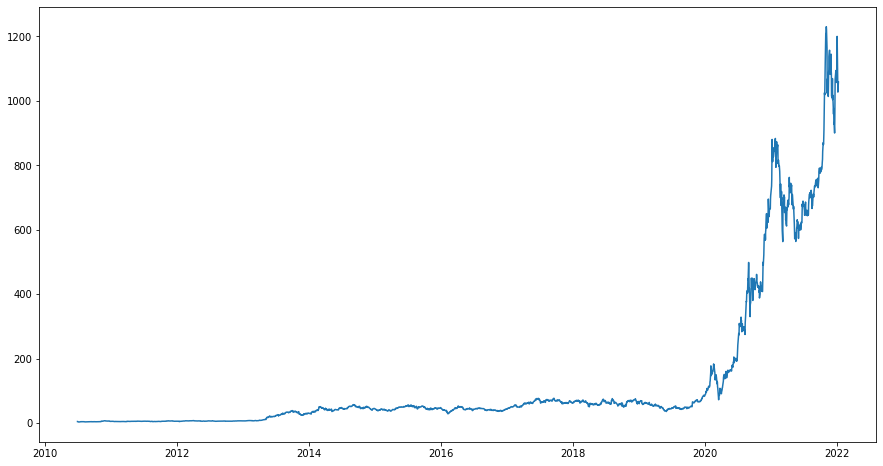

In [ ]:
# 3번 셀

# 데이터 읽기
path = '/content/drive/MyDrive/dataset/TSLA.csv'

data = pd.read_csv(path,
                   usecols=['Date', 'Close'],
                   parse_dates=True,
                   index_col='Date')

# 샘플 출력
print(data.head(10))
print(data.describe())
plt.figure(figsize=(15, 8))
plt.plot(data)


In [ ]:
# 4번 셀

# 데이터 정규화
scaler = MinMaxScaler()
m_data = scaler.fit_transform(data)

print(m_data)
# numpy에서 pandas로 전환
tmp = pd.DataFrame(m_data)
print(tmp.describe())

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.86532702]
 [0.83456281]
 [0.85996329]]
                 0
count  2905.000000
mean      0.099624
std       0.187943
min       0.000000
25%       0.011738
50%       0.035047
75%       0.052002
max       1.000000


In [ ]:
# 5번 셀

# 데이터 나누기
split = []
size = len(m_data)
print('데이터 수:', size)

for i in range(size - MY_PAST):
    split.append(m_data[i: i + MY_PAST + 1])

print(m_data.flatten())
print(split[0])
print(split[1])
print('총 6개 묶음 수:', len(split))

데이터 수: 2905
[0.00131893 0.00130915 0.00100428 ... 0.86532702 0.83456281 0.85996329]
[[1.31893210e-03]
 [1.30915016e-03]
 [1.00427957e-03]
 [5.54310154e-04]
 [5.05400434e-05]
 [0.00000000e+00]]
[[1.30915016e-03]
 [1.00427957e-03]
 [5.54310154e-04]
 [5.05400434e-05]
 [0.00000000e+00]
 [2.70633781e-04]]
총 6개 묶음 수: 2900


In [ ]:
# 6번 셀

# 데이터를 입력과 출력으로 분할
split = np.array(split)
X_data = split[:, 0:MY_PAST]
#print(X_data)
print('입력 데이터 모양:', X_data.shape)

Y_data = split[:, -1]
#print(split[0])
#print(X_data[0])
#print(Y_data[0])
print('출력 데이터 모양:', Y_data.shape)

입력 데이터 모양: (2900, 5, 1)
출력 데이터 모양: (2900, 1)


In [ ]:
# 7번 셀

# 학습용 데이터만 사용
X_train = X_data
Y_train = Y_data

# 최종 데이터 모양 확인
print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)


학습용 입력 데이터: (2900, 5, 1)
학습용 출력 데이터: (2900, 1)


In [ ]:
# 8번 셀

# RNN 구현
model = Sequential()

# LSTM 층
model.add(LSTM(units=MY_HIDDEN,
               input_shape=(MY_PAST, 1)))

# 출력층
model.add(Dense(units=1))

# RNN 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 9번 셀

# RNN 학습
model.compile(optimizer='adam',
              loss='mse')

print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print('총 학습 시간:', end - begin)

학습 시작
Epoch 1/100
91/91 [==============================] - 2s 3ms/step - loss: 0.0035
Epoch 2/100
91/91 [==============================] - 0s 3ms/step - loss: 2.1850e-04
Epoch 3/100
91/91 [==============================] - 0s 3ms/step - loss: 2.2092e-04
Epoch 4/100
91/91 [==============================] - 0s 3ms/step - loss: 1.9711e-04
Epoch 5/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5804e-04
Epoch 6/100
91/91 [==============================] - 0s 3ms/step - loss: 1.9365e-04
Epoch 7/100
91/91 [==============================] - 0s 3ms/step - loss: 2.3132e-04
Epoch 8/100
91/91 [==============================] - 0s 3ms/step - loss: 1.9191e-04
Epoch 9/100
91/91 [==============================] - 0s 3ms/step - loss: 2.0156e-04
Epoch 10/100
91/91 [==============================] - 0s 3ms/step - loss: 1.7297e-04
Epoch 11/100
91/91 [==============================] - 0s 4ms/step - loss: 1.9680e-04
Epoch 12/100
91/91 [==============================] - 0s 3ms/step - loss

In [ ]:
# 10번 셀



In [ ]:
# 11번 셀

# RNN 예측
pred = model.predict(X_train)
pred_ori = scaler.inverse_transform(pred)
print('RNN이 오늘 비트 코인 예측한 값:', pred_ori[-1])
answer = scaler.inverse_transform(Y_train)
print('오늘 비트 코인 값:', answer[-1])


RNN이 오늘 비트 코인 예측한 값: [1033.4576]
오늘 비트 코인 값: [1058.119995]


In [ ]:
# 12번 셀

# 비트 코인 내일 시세 예측
tmp = data[-5:]
print(tmp)
tom = m_data[-5:]
print(tom)
print(tom.shape)

# 인공신경망에 사용되는 데이터는 항상 배치 정보 필수
tom = tom.reshape(1, 5, 1)
pred = model.predict(tom)
pred = scaler.inverse_transform(pred)
print('RNN이 예측한 내일 비트코인 시세:', pred)


                  Close
Date                   
2022-01-04  1149.589966
2022-01-05  1088.119995
2022-01-06  1064.699951
2022-01-07  1026.959961
2022-01-10  1058.119995
[[0.93452613]
 [0.88441815]
 [0.86532702]
 [0.83456281]
 [0.85996329]]
(5, 1)
RNN이 예측한 내일 비트코인 시세: [[1065.599]]
